TJ Wiegman  
ASM 591AI  
Lab 3  
2024-09-18  

# Introduction to Bayesian Networks and Decision-Making Under Uncertainty

## 1. Conditional Probability and Bayes' Theorem

In this section, we will explore conditional probability and Bayes' Theorem.

### Concept:
Conditional probability refers to the probability of an event occurring, given that another event has already occurred. Bayes' Theorem helps us compute this with the formula:

\[
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\]

### Example: Calculate Conditional Probability

Given:
- \( P(A) = 0.3 \)
- \( P(B|A) = 0.8 \)
- \( P(B) = 0.5 \)

Let's calculate \( P(A|B) \) using Bayes' Theorem.

In [1]:
# Basic Python: Calculate conditional probabilities using functions.
P_A = 0.3  # Probability of event A (e.g., it rains)
P_B_given_A = 0.8  # Probability of event B given A (e.g., grass is wet given rain)
P_B = 0.5  # Overall probability of event B

P_A_given_B = (P_B_given_A * P_A) / P_B  # Bayes' Theorem formula
print(f'P(A|B) = {P_A_given_B:.2f}')


P(A|B) = 0.48


## 2. Introduction to Python Libraries for Bayesian Networks

We will use the `pgmpy` library to create, manage, and query Bayesian Networks in Python.

To install the `pgmpy` library, run the following command in your terminal or notebook:


In [2]:
# wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb
# sudo dpkg -i cuda-keyring_1.1-1_all.deb
# sudo apt update && sudo apt install cuda-toolkit-12-4
# pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
# pip3 install pgmpy


### Importing Required Libraries
Now, let’s import the necessary libraries for creating and manipulating Bayesian Networks.


In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


## 3. Creating a Simple Bayesian Network

### Concept:
A Bayesian Network is a graph where:
- **Nodes** represent variables (e.g., Rain, Sprinkler, Grass Wet).
- **Edges** represent conditional dependencies between variables.
- **Conditional Probability Tables (CPDs)** specify the probabilities for each variable.

### Example: A Bayesian Network for Rain, Sprinkler, and Grass Wet
Let’s define the structure and CPDs for a simple Bayesian Network.


In [4]:
# Define the structure of the network
model = BayesianNetwork([('Rain', 'Grass Wet'), ('Sprinkler', 'Grass Wet')])

# Define the Conditional Probability Distributions (CPDs)
cpd_rain = TabularCPD(variable='Rain', variable_card=2, values=[[0.7], [0.3]])
cpd_sprinkler = TabularCPD(variable='Sprinkler', variable_card=2, values=[[0.8], [0.2]])
cpd_grass_wet = TabularCPD(variable='Grass Wet', variable_card=2,
                           values=[[0.99, 0.9, 0.8, 0.0],
                                   [0.01, 0.1, 0.2, 1.0]],
                           evidence=['Rain', 'Sprinkler'], evidence_card=[2, 2])

# Add CPDs to the model
model.add_cpds(cpd_rain, cpd_sprinkler, cpd_grass_wet)

# Validate the model
assert model.check_model()
print("Bayesian Network Model created successfully!")


Bayesian Network Model created successfully!


## 4. Visualizing the Bayesian Network

We can visualize the structure of our Bayesian Network using the `networkx` and `matplotlib` libraries.

Let’s plot the network to see the connections between the variables.


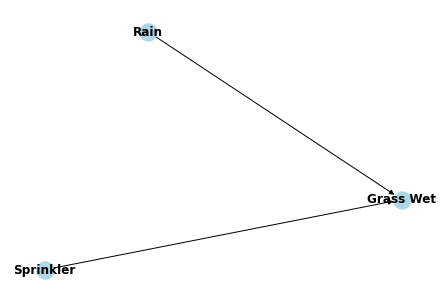

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Draw the structure of the Bayesian Network
nx_graph = nx.DiGraph()

# Add the nodes and edges from the Bayesian Network model
nx_graph.add_edges_from(model.edges())

pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()


## 5. Querying the Bayesian Network

Once we have a Bayesian Network, we can query it to compute the probability of certain outcomes given evidence.

### Example: Probability that the Grass is Wet given it Rained
We will use `VariableElimination` to perform inference.


In [6]:
infer = VariableElimination(model)
# Query: What is the probability that the grass is wet given that it rained?
result = infer.query(variables=['Grass Wet'], evidence={'Rain': 1})
print(result)


+--------------+------------------+
| Grass Wet    |   phi(Grass Wet) |
+==============+==================+
| Grass Wet(0) |           0.6400 |
+--------------+------------------+
| Grass Wet(1) |           0.3600 |
+--------------+------------------+


## 6. D-Separation and Independence

D-Separation is a property that helps us understand whether two variables are independent given some observed evidence. It is a key concept in Bayesian Networks.

### Example: Check if Sprinkler is independent of Rain given that Grass is Wet.
You can compare whether P(Sprinkler | Grass Wet) is the same as P(Sprinkler | Grass Wet, Rain). If they are equal, Sprinkler is independent of Rain given Grass Wet

In [7]:
# Query without 'Rain' as evidence
result_without_rain = infer.query(variables=['Sprinkler'], evidence={'Grass Wet': 1})
print("P(Sprinkler | Grass Wet):")
print(result_without_rain)

# Query with 'Rain' as additional evidence
result_with_rain = infer.query(variables=['Sprinkler'], evidence={'Grass Wet': 1, 'Rain': 1})
print("\nP(Sprinkler | Grass Wet, Rain):")
print(result_with_rain)



P(Sprinkler | Grass Wet):
+--------------+------------------+
| Sprinkler    |   phi(Sprinkler) |
+==============+==================+
| Sprinkler(0) |           0.4201 |
+--------------+------------------+
| Sprinkler(1) |           0.5799 |
+--------------+------------------+

P(Sprinkler | Grass Wet, Rain):
+--------------+------------------+
| Sprinkler    |   phi(Sprinkler) |
+==============+==================+
| Sprinkler(0) |           0.4444 |
+--------------+------------------+
| Sprinkler(1) |           0.5556 |
+--------------+------------------+


# Bayesian Networks: Practical Exercise

In this exercise, you will create and query Bayesian Networks using Python, apply concepts of conditional probability, and explore more complex structures than in the workbook. The exercise is broken into 10 tasks designed to help you solidify your understanding of Bayesian Networks.

---

## Q1. Conditional Probability Using Python

**(a)** Given the following probabilities:

- \( P(A) = 0.4 \) (Probability it will rain)
- \( P(B|A) = 0.6 \) (Probability the grass will be wet if it rains)
- \( P(B) = 0.3 \) (Overall probability of the grass being wet)

Write a Python function that uses **Bayes' Theorem** to compute \( P(A|B) \), the probability that it rains given the grass is wet.

**(b)** Modify the function to accept any input probabilities \( P(A) \), \( P(B|A) \), and \( P(B) \). Use this function to calculate the following:

- \( P(A|B) \) for \( P(A) = 0.5 \), \( P(B|A) = 0.8 \), and \( P(B) = 0.4 \).



In [8]:
# Solution:
def conditional_probability(P_A, P_B_given_A, P_B):
    return (P_B_given_A * P_A) / P_B 

# Example calculation:
P_A_given_B = conditional_probability(0.4, 0.6, 0.3)
print(f'P(A|B) = {P_A_given_B:.2f}')


P(A|B) = 0.80


## Q2. Creating a Bayesian Network with Three Nodes

**(a)** Create a Bayesian Network with the following nodes:

- **Cloudy**: Whether it is cloudy (True/False)
- **Sprinkler**: Whether the sprinkler is on (True/False)
- **Rain**: Whether it is raining (True/False)
- **Wind**: Whether it's windy (True/False)
- **Grass Wet**: Whether the grass is wet (True/False)

### Instructions:

- The sprinkler is more likely to be turned on when it is not cloudy.
- It is more likely to rain when it is cloudy.
- The grass being wet depends on whether it rained or the sprinkler was on.
- Windy conditions affect the sprinkler's effectiveness at wetting the grass.

### Steps:

- Define the edges between the nodes to reflect these relationships.
- Add **Conditional Probability Distributions (CPDs)** for each node.
- Validate the model to ensure that the dependencies are properly defined.



In [9]:
# Define the structure of the Bayesian Network
model = BayesianNetwork([('Cloudy', 'Sprinkler'),
                         ('Cloudy', 'Rain'),
                         ('Sprinkler', 'Grass Wet'),
                         ('Rain', 'Grass Wet'),
                         ('Wind', 'Grass Wet')])

# Define CPDs for each node
cpd_cloudy = TabularCPD(
    variable="Cloudy",
    variable_card=2,
    values=[[0.7], # clear
            [0.3]] # clouds
)

# Sprinkler depends on Cloudy
cpd_sprinkler = TabularCPD(
    variable="Sprinkler",
    variable_card=2,
    evidence=["Cloudy"],
    evidence_card=[2],
    values=[[0.2, 0.9], # sprinkler is off [clear, cloudy]
            [0.8, 0.1]] # sprinkler is on  [clear, cloudy]
)

# Rain depends on Cloudy
cpd_rain = TabularCPD(
    variable="Rain",
    variable_card=2,
    evidence=["Cloudy"],
    evidence_card=[2],
    values=[[0.9, 0.5], # not raining [clear, cloudy]
            [0.1, 0.5]] # is raining  [clear, cloudy]
)

# Wind is independent for now (can be expanded later)
cpd_wind = TabularCPD(
    variable="Wind",
    variable_card=2,
    values=[[0.85], # calm
            [0.15]] # wind
)

# Grass Wet depends on Sprinkler, Rain, and Wind
# The CPD must account for all combinations of Sprinkler, Rain, and Wind (2 x 2 x 2 = 8 rows)
cpd_grass_wet = TabularCPD(
    variable="Grass Wet",
    variable_card=2,
    evidence=["Sprinkler", "Rain", "Wind"],
    evidence_card=[2,2,2],
    values=[[0.95, 0.99,  # Dry Grass: Sprinkler Off + NoRain/Calm, NoRain/Wind
             0.02, 0.03,  # Dry Grass: Sprinkler Off + Rain/Calm,   Rain/Wind
             0.05, 0.15,  # Dry Grass: Sprinkler On +  NoRain/Calm, NoRain/Wind
             0.00, 0.01], # Dry Grass: Sprinkler On +  Rain/Calm,   Rain/Wind
            [0.05, 0.01,  # Wet Grass: Sprinkler Off + NoRain/Calm, NoRain/Wind
             0.98, 0.97,  # Wet Grass: Sprinkler Off + Rain/Calm,   Rain/Wind
             0.95, 0.85,  # Wet Grass: Sprinkler On +  NoRain/Calm, NoRain/Wind
             1.00, 0.99]] # Wet Grass: Sprinkler On +  Rain/Calm,   Rain/Wind
)

# Add the CPDs to the model
model.add_cpds(cpd_cloudy, cpd_sprinkler, cpd_rain, cpd_wind, cpd_grass_wet)

# Validate the model
try:
    model.check_model()
    print("Model validated successfully!")
except ValueError as e:
    print(f"Model validation error: {e}")


Model validated successfully!


## Q3. Visualizing the Bayesian Network

Visualize the Bayesian Network created in **Q2** using `networkx` and `matplotlib`.

### Instructions:

- Use `networkx` to generate the graph.
- Make sure the nodes and edges are labeled correctly.



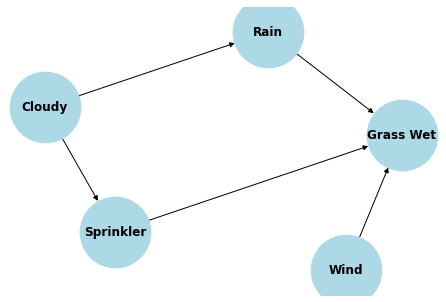

In [10]:
# Solution:
import matplotlib.pyplot as plt
import networkx as nx

# Draw the structure of the Bayesian Network
nx_graph = nx.DiGraph()

# Add the nodes and edges from the Bayesian Network model
nx_graph.add_edges_from(model.edges())

pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=5000)
plt.show()


## Q4. Querying the Bayesian Network

**(a)** Query the Bayesian Network created in **Q2** to find the probability that the **Grass is Wet** given that it is **Cloudy**.

**(b)** Now, calculate the probability that the **Grass is Wet** given both **Cloudy** and **Windy** conditions.

Use the `VariableElimination` method for inference.



In [11]:
# Solution:
from pgmpy.inference import VariableElimination

# Perform inference on the model
infer = VariableElimination(model)


# Query: What is the probability that the grass is wet given it is cloudy?
result = infer.query(variables=["Grass Wet"], evidence={"Cloudy": 1})
print("P(Grass Wet | Cloudy):")
print(result)

# Query: Probability that grass is wet given Cloudy and Windy
result_windy = infer.query(variables=["Grass Wet"], evidence={"Cloudy": 1, "Wind": 1})
print("\nP(Grass Wet | Cloudy, Windy):")
print(result_windy)



P(Grass Wet | Cloudy):
+--------------+------------------+
| Grass Wet    |   phi(Grass Wet) |
+==============+==================+
| Grass Wet(0) |           0.4432 |
+--------------+------------------+
| Grass Wet(1) |           0.5568 |
+--------------+------------------+

P(Grass Wet | Cloudy, Windy):
+--------------+------------------+
| Grass Wet    |   phi(Grass Wet) |
+==============+==================+
| Grass Wet(0) |           0.4670 |
+--------------+------------------+
| Grass Wet(1) |           0.5330 |
+--------------+------------------+


## Q5. Introducing a New Node and Dependencies

**(a)** Add a new node **Storm** to the Bayesian Network from **Q2**, where **Storm** influences both **Rain** and **Wind**.

### Instructions:

- Define the new relationships: a storm makes it more likely to rain and makes it windy.
- Add appropriate CPDs for the **Storm** node.
- Validate the model and ensure everything is correctly structured.

**(b)** Query the network to compute the probability of the **Grass being Wet** given that there is a **Storm**.



In [12]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Define the structure of the Bayesian Network with the new node 'Storm'
model = BayesianNetwork([('Cloudy', 'Sprinkler'),
                         ('Cloudy', 'Rain'),
                         ('Sprinkler', 'Grass Wet'),
                         ('Rain', 'Grass Wet'),
                         ('Wind', 'Grass Wet'),
                         ('Storm', 'Rain'),
                         ('Storm', 'Wind')])

# CPDs for Cloudy
cpd_cloudy = TabularCPD(
    variable="Cloudy",
    variable_card=2,
    values=[[0.7], # clear
            [0.3]] # clouds
)

# CPDs for Sprinkler, depending on Cloudy
cpd_sprinkler = TabularCPD(
    variable="Sprinkler",
    variable_card=2,
    evidence=["Cloudy"],
    evidence_card=[2],
    values=[[0.2, 0.9], # sprinkler is off [clear, cloudy]
            [0.8, 0.1]] # sprinkler is on  [clear, cloudy]
)

# CPDs for Rain, depending on Cloudy and Storm
#   - storm makes it more likely to rain and makes it windy.
cpd_rain = TabularCPD(
    variable="Rain",
    variable_card=2,
    evidence=["Cloudy", "Storm"],
    evidence_card=[2, 2],
    values=[[0.99, 0.80,  # NoRain: Clear/NoStorm, Clear/Storm,
             0.50, 0.05], # NoRain: Cloudy/NoStorm, Cloudy/Storm
            [0.01, 0.20,  # IsRain: Clear/NoStorm, Clear/Storm,
             0.50, 0.95]] # IsRain: Cloudy/NoStorm, Cloudy/Storm
)

# CPDs for Wind, depending on Storm
cpd_wind = TabularCPD(
    variable="Wind",
    variable_card=2,
    evidence=["Storm"],
    evidence_card=[2],
    values=[[0.85, 0.1], # Calm: NoStorm, Storm
            [0.15, 0.9]] # Wind: NoStorm, Storm
)

# CPD for Storm (assume 20% chance of a storm)
cpd_storm = TabularCPD(
    variable="Storm",
    variable_card=2,
    values=[[0.8], # No Storm
            [0.2]] # Storming
)

# CPDs for Grass Wet, depending on Sprinkler, Rain, and Wind
cpd_grass_wet = TabularCPD(
    variable="Grass Wet",
    variable_card=2,
    evidence=["Sprinkler", "Rain", "Wind"],
    evidence_card=[2,2,2],
    values=[[0.95, 0.99,  # Dry Grass: Sprinkler Off + NoRain/Calm, NoRain/Wind
             0.02, 0.03,  # Dry Grass: Sprinkler Off + Rain/Calm,   Rain/Wind
             0.05, 0.15,  # Dry Grass: Sprinkler On +  NoRain/Calm, NoRain/Wind
             0.00, 0.01], # Dry Grass: Sprinkler On +  Rain/Calm,   Rain/Wind
            [0.05, 0.01,  # Wet Grass: Sprinkler Off + NoRain/Calm, NoRain/Wind
             0.98, 0.97,  # Wet Grass: Sprinkler Off + Rain/Calm,   Rain/Wind
             0.95, 0.85,  # Wet Grass: Sprinkler On +  NoRain/Calm, NoRain/Wind
             1.00, 0.99]] # Wet Grass: Sprinkler On +  Rain/Calm,   Rain/Wind
)

# Add CPDs to the model
model.add_cpds(cpd_cloudy, cpd_sprinkler, cpd_rain, cpd_wind, cpd_storm, cpd_grass_wet)

# Validate the model
try:
    model.check_model()
    print("Model validated successfully!")
except ValueError as e:
    print(f"Model validation error: {e}")





Model validated successfully!


In [13]:
from pgmpy.inference import VariableElimination

# Perform inference on the model
infer = VariableElimination(model)

# Query: What is the probability that the grass is wet given that there is a storm?
result = infer.query(variables=["Grass Wet"], evidence={"Storm": 1})
print(result)


+--------------+------------------+
| Grass Wet    |   phi(Grass Wet) |
+==============+==================+
| Grass Wet(0) |           0.1962 |
+--------------+------------------+
| Grass Wet(1) |           0.8038 |
+--------------+------------------+



## Q6. D-Separation and Conditional Independence

### **(a)** In the updated network from **Q5**, check if **Sprinkler** is d-separated from **Wind** given that the **Grass is Wet**.

### **(b)** Perform a manual conditional independence check by comparing the following probabilities:
  - \( P(\text{Sprinkler}|\text{Grass Wet}) \)
  - \( P(\text{Sprinkler}|\text{Grass Wet}, \text{Wind}) \)

If the probabilities are the same, the variables are conditionally independent.

### **Instructions:**
  - Use the `VariableElimination` method to perform the queries.
  - If the probabilities are equal, it indicates conditional independence between `Sprinkler` and `Wind` given `Grass Wet`.

---

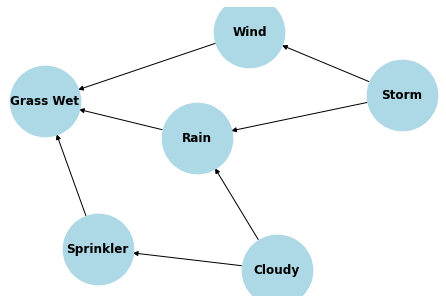

In [20]:
# Draw the structure of the Bayesian Network
nx_graph = nx.DiGraph()

# Add the nodes and edges from the Bayesian Network model
nx_graph.add_edges_from(model.edges())

pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=5000)
plt.show()

**Sprinkler** is not d-separated from **Wind**, because they both inherit causality from the higher node **Storm** (though Sprinkler's inheritance is through an indirect correlation rather than direct causation).

In [15]:
# Perform inference
infer = VariableElimination(model)

# Query P(Sprinkler | Grass Wet)
result_grass_wet = infer.query(variables=["Sprinkler"], evidence={"Grass Wet": 1})
print("P(Sprinkler | Grass Wet):")
print(result_grass_wet)

# Query P(Sprinkler | Grass Wet, Wind)
result_grass_wet_wind = infer.query(variables=["Sprinkler"], evidence={"Grass Wet": 1, "Wind": 1})
print("\nP(Sprinkler | Grass Wet, Wind):")
print(result_grass_wet_wind)


P(Sprinkler | Grass Wet):
+--------------+------------------+
| Sprinkler    |   phi(Sprinkler) |
+==============+==================+
| Sprinkler(0) |           0.2391 |
+--------------+------------------+
| Sprinkler(1) |           0.7609 |
+--------------+------------------+

P(Sprinkler | Grass Wet, Wind):
+--------------+------------------+
| Sprinkler    |   phi(Sprinkler) |
+==============+==================+
| Sprinkler(0) |           0.2999 |
+--------------+------------------+
| Sprinkler(1) |           0.7001 |
+--------------+------------------+


0.76 != 0.70 confirms the claim made above.


## Q7. Medical Diagnosis Problem

**Scenario**: A simplified medical diagnosis system.

### **(a)** Create a Bayesian Network to model the following nodes:
  - **Disease**: Whether the patient has a disease (True/False)
  - **Test Result**: Whether a diagnostic test result is positive or negative (True/False)
  - **Symptoms**: Whether the patient exhibits certain symptoms (True/False)

### **(b)** Define the relationships:
  - The presence of the **Disease** influences both the **Test Result** and **Symptoms**.
  - Use probabilities to define how likely the test is positive and how likely symptoms appear given that the patient has the disease.
  
### **(c)** Define the CPDs for all nodes:
  - Assume the probability of having the disease is 1%.
  - The test is 95% accurate when the disease is present and has a 5% false positive rate.
  - Symptoms appear 80% of the time when the disease is present, and 10% of the time when it is absent.

### **(d)** Query the network:
  - Compute the probability that a patient has the disease given that both the test is positive and symptoms are present.

---

In [16]:
# Define the structure of the medical network
medical_model = BayesianNetwork([('Disease', 'Test Result'),
                                 ('Disease', 'Symptoms')])

# CPD for Disease
cpd_disease = TabularCPD(
    variable="Disease",
    variable_card=2,
    values=[[0.99], # Healthy
            [0.01]] # Sick
)
# CPD for Test Result, depending on Disease
cpd_test_result = TabularCPD(
    variable="Test Result",
    variable_card=2,
    evidence=["Disease"],
    evidence_card=[2],
    values=[[0.95, 0.05], # Negative: Healthy, Sick
            [0.05, 0.95]] # Positive: Healthy, Sick
)

# CPD for Symptoms, depending on Disease
cpd_symptoms = TabularCPD(
    variable="Symptoms",
    variable_card=2,
    evidence=["Disease"],
    evidence_card=[2],
    values=[[0.9, 0.2], # Asymptom: Healthy, Sick
            [0.1, 0.8]] # Symptoms: Healthy, Sick
)

# Add the CPDs to the model
medical_model.add_cpds(cpd_disease, cpd_test_result, cpd_symptoms)

# Validate the model
medical_model.check_model()

# Perform inference
medical_infer = VariableElimination(medical_model)

# Query: What is the probability of Disease given positive Test Result and Symptoms?
result = medical_infer.query(variables=['Disease'], evidence={'Test Result': 1, 'Symptoms': 1})
print(result)


+------------+----------------+
| Disease    |   phi(Disease) |
+============+================+
| Disease(0) |         0.3944 |
+------------+----------------+
| Disease(1) |         0.6056 |
+------------+----------------+



## Q8. Weather and Traffic Problem

### **(a)** Create a Bayesian Network with the following nodes:
  - **Weather**: Whether the weather is good or bad (True/False)
  - **Traffic**: Whether there is heavy traffic (True/False)
  - **Late to Work**: Whether someone is late to work (True/False)

### **(b)** Define relationships between the nodes:
  - Bad weather increases the likelihood of heavy traffic.
  - Heavy traffic increases the chance of being late to work.
  - Good weather decreases the likelihood of being late due to traffic.

### **(c)** Define the CPDs for all nodes:
  - Assume the probability of bad weather is 30%.
  - The probability of traffic is higher during bad weather (80%) than during good weather (20%).
  - The probability of being late to work is 90% if there is traffic and only 30% if there is no traffic.

### **(d)** Query the network:
  - Compute the probability of being late to work given that the weather is bad.

In [17]:
# Define the structure of the weather-traffic network
traffic_model = BayesianNetwork([('Weather', 'Traffic'),
                                 ('Traffic', 'Late to Work')])

# CPD for Weather
cpd_weather = TabularCPD(
    variable="Weather",
    variable_card=2,
    values=[[0.7], # Good Weather
            [0.3]] # Bad Weather
)
# CPD for Traffic, depending on Weather
cpd_traffic = TabularCPD(
    variable="Traffic",
    variable_card=2,
    evidence=["Weather"],
    evidence_card=[2],
    values=[[0.2, 0.8], # Clear: GoodWeather, BadWeather
            [0.8, 0.2]] # Traffic: GoodWeather, BadWeather
)
# CPD for Late to Work, depending on Traffic
cpd_late_to_work = TabularCPD(
    variable="Late to Work",
    variable_card=2,
    evidence=["Traffic"],
    evidence_card=[2],
    values=[[0.7, 0.1], # Timely: Clear, Traffic
            [0.3, 0.9]] # Late:  Clear, Trafic
)

# Add the CPDs to the model
traffic_model.add_cpds(cpd_weather, cpd_traffic, cpd_late_to_work)

# Validate the model
traffic_model.check_model()

# Perform inference
traffic_infer = VariableElimination(traffic_model)

# Query: What is the probability of being late given bad weather?
result = traffic_infer.query(variables=['Late to Work'], evidence={'Weather': 1})
print(result)


+-----------------+---------------------+
| Late to Work    |   phi(Late to Work) |
+=================+=====================+
| Late to Work(0) |              0.5800 |
+-----------------+---------------------+
| Late to Work(1) |              0.4200 |
+-----------------+---------------------+


## Q9. Earthquake and Alarm System

### **(a)** Create a Bayesian Network to model the following nodes:
  - **Earthquake**: Whether there is an earthquake (True/False)
  - **Burglary**: Whether there is a burglary (True/False)
  - **Alarm**: Whether the alarm goes off (True/False)
  - **Neighbor Calls**: Whether the neighbor calls the police (True/False)

### **(b)** Define the relationships:
  - Both an **Earthquake** and a **Burglary** can set off the alarm.
  - The **Alarm** going off increases the chance of the **Neighbor Calling**.
  
### **(c)** Define the CPDs:
  - The probability of an earthquake is 1%.
  - The probability of a burglary is 2%.
  - The probability of the alarm going off is higher if either an earthquake or burglary occurs.
  - The neighbor calls the police 70% of the time if the alarm goes off.

### **(d)** Query the network:
  - Compute the probability that an **Earthquake** has occurred given that the **Neighbor Called**.

In [18]:
# Define the structure of the earthquake-alarm network
alarm_model = BayesianNetwork([('Earthquake', 'Alarm'),
                               ('Burglary', 'Alarm'),
                               ('Alarm', 'Neighbor Calls')])

# CPD for Earthquake
cpd_earthquake = TabularCPD(
    variable="Earthquake",
    variable_card=2,
    values=[[0.99], # Calm
            [0.01]] # Quake
)

# CPD for Burglary
cpd_burglary = TabularCPD(
    variable="Burglary",
    variable_card=2,
    values=[[0.98], # Safe
            [0.02]] # Theft
)

# CPD for Alarm
cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    evidence=["Earthquake", "Burglary"],
    evidence_card=[2,2],
    values=[[0.99, 0.1, 0.3, 0.01], # Quiet: Calm/Safe, Calm/Theft, Quake/Safe, Quake/Theft
            [0.01, 0.9, 0.7, 0.99]] # Alarm: Calm/Safe, Calm/Theft, Quake/Safe, Quake/Theft
)

# CPD for Neighbor Calls
cpd_neighbor = TabularCPD(
    variable="Neighbor Calls",
    variable_card=2,
    evidence=["Alarm"],
    evidence_card=[2],
    values=[[1, 0.3], # NoCall: Quiet, Alarm
            [0, 0.7]] # Calls: Quiet, Alarm
)

# Add the CPDs to the model
alarm_model.add_cpds(cpd_earthquake, cpd_burglary, cpd_alarm, cpd_neighbor)

# Validate the model
alarm_model.check_model()

# Perform inference
alarm_infer = VariableElimination(alarm_model)

# Query: What is the probability that an earthquake occurred given that the neighbor called?
result = alarm_infer.query(variables=['Earthquake'], evidence={'Neighbor Calls': 1})
print(result)


+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.7959 |
+---------------+-------------------+
| Earthquake(1) |            0.2041 |
+---------------+-------------------+


## Q10. Combining Two Small Networks

### **(a)** Create two separate Bayesian Networks:
  - **Network 1**: Models the **Weather** and **Traffic** relationship from **Q8**.
  - **Network 2**: Models the **Earthquake** and **Alarm** relationship from **Q9**.

### **(b)** Combine these two networks into a single Bayesian Network by introducing a new node **Reach Office on Time** that depends on whether someone is late due to traffic (from **Network 1**) and whether the alarm went off due to an earthquake or burglary (from **Network 2**).

### **(c)** Define the new CPD for **Reach Office on Time**:
  - The probability of reaching the office on time is reduced if the person is late due to traffic or if they were delayed by an alarm triggered by a burglary/earthquake.

### **(d)** Query the network:
  - Compute the probability of reaching the office on time given that there is **bad weather** and the **alarm went off**.



In [19]:
# Create Network 1: Weather and Traffic
network1 = traffic_model
network1.check_model()

# Create Network 2: Earthquake and Alarm
network2 = alarm_model
network2.check_model()

# Combine Networks by adding a new node 'Reach Office on Time'
combined_model = BayesianNetwork([('Weather', 'Traffic'),
                                  ('Traffic', 'Late to Work'),
                                  ('Earthquake', 'Alarm'),
                                  ('Burglary', 'Alarm'),
                                  ('Alarm', 'Neighbor Calls'),
                                  ("Late to Work", "Reach Office on Time"),
                                  ("Alarm", "Reach Office on Time")])

# New CPD for Reach Office on Time depending on Late to Work and Alarm
cpd_reach_office = TabularCPD(
    variable="Reach Office on Time",
    variable_card=2,
    evidence=["Late to Work", "Alarm"],
    evidence_card=[2,2],
    values=[[0, 0.6, 0.95, 0.99], # Tardy:  NotLate/Quiet, NotLate/Alarm, Late/Quiet, Late/Alarm
            [1, 0.4, 0.05, 0.01]] # Timely: NotLate/Quiet, NotLate/Alarm, Late/Quiet, Late/Alarm
)

# Add combined CPDs to the new model
combined_model.add_cpds(cpd_weather, cpd_traffic, cpd_late_to_work, cpd_earthquake, cpd_burglary, cpd_alarm, cpd_neighbor, cpd_reach_office)

# Validate the combined model
combined_model.check_model()

# Perform inference
combined_infer = VariableElimination(combined_model)

# Query: What is the probability of reaching the office on time given bad weather and the alarm went off?
result_combined = combined_infer.query(variables=['Reach Office on Time'], evidence={'Weather': 1, 'Alarm': 1})
print(result_combined)


+-------------------------+-----------------------------+
| Reach Office on Time    |   phi(Reach Office on Time) |
+=========================+=============================+
| Reach Office on Time(0) |                      0.7638 |
+-------------------------+-----------------------------+
| Reach Office on Time(1) |                      0.2362 |
+-------------------------+-----------------------------+
